### Analysing Data

In [59]:
import pandas as  pd

In [60]:
# reading the dataset
all_tweets = pd.read_csv('Machine Learning-tweets.csv')

In [61]:
# As I scraped 5000 tweets
print(len(all_tweets))

5000


In [62]:
# Text, No-of-Retweets, Followers, Friends

print(len(all_tweets.columns))

4


In [63]:
print(len(all_tweets.loc[0]['Text']))

85


In [64]:
print(all_tweets.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Text            5000 non-null   object
 1   No-of-Retweets  5000 non-null   int64 
 2   Followers       5000 non-null   int64 
 3   Friends         5000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 156.4+ KB
None


In [65]:
all_tweets.describe()

,No-of-Retweets,Followers,Friends
count,5000.00000,5.000000e+03,5000.000000
mean,63.02480,7.074012e+03,1976.010600
std,287.17646,6.780665e+04,7151.638373
min,0.00000,0.000000e+00,0.000000
25%,2.00000,2.820000e+02,1.000000
50%,6.00000,2.365000e+03,224.000000
75%,18.00000,4.427500e+03,1661.000000
max,5159.00000,2.708174e+06,272965.000000


In [66]:
all_tweets.head()

,Text,No-of-Retweets,Followers,Friends
0,How do we build trust between humans and AI? #...,0,8248,9070
1,Security and privacy concerns are the top barr...,1,2820,2957
2,Machine learning is hard :(,1,248,241
3,RT @SEOBravo: #FREECOURSE Save time learn How ...,1,2777,1
4,#FREECOURSE Save time learn How to Setup a loc...,1,3469,11


In [67]:
all_tweets.tail()

,Text,No-of-Retweets,Followers,Friends
4995,RT @ExBio4: With our machine learning expertis...,3,15,83
4996,CIOs are turning to #startups for #AI &amp; ma...,1,6016,1129
4997,RT @machinelearnflx: R: Machine Learning with ...,7,4541,5006
4998,RT @kdnuggets: Deploy a #MachineLearning Pipel...,13,212,1
4999,"RT @davidly: Photography, Machine Learning, Co...",3,141,172


### Defining the Tweets as Viral or Not

In [68]:
import numpy as np

In [69]:
all_tweets['is_viral'] = np.where(all_tweets['No-of-Retweets'] > 1000, 1, 0)

In [70]:
# 0 means the tweet is not_viral and 1 mean is is_viral
all_tweets['is_viral'].value_counts()

0    4881
1     119
Name: is_viral, dtype: int64

### Feature Engineering

Now finding the features that we think are relevant for our analysis for whether or not the tweet will go viral. We are considering tweet_length, followers_count, friends_count, hashtag_count, http_count, word_count and average_word_len as our features for training of model.

In [71]:
# apply() function calls the lambda function and applies it to every row or 
# column of the dataframe and returns a modified copy of the dataframe:

# the axis = 1 means the column

all_tweets['tweet_length'] = all_tweets.apply(lambda tweet: len(tweet['Text']), axis=1)

In [72]:
all_tweets['followers_count'] = all_tweets.apply(lambda tweet: tweet['Followers'], axis=1)

In [73]:
all_tweets['friends_count'] = all_tweets.apply(lambda tweet: tweet['Friends'], axis=1)

In [74]:
all_tweets['hashtags_count'] = all_tweets.apply(lambda tweet: tweet['Text'].count('#'), axis = 1)

In [75]:
all_tweets['http_count'] = all_tweets.apply(lambda tweet: tweet['Text'].count('http'), axis = 1)

In [76]:
all_tweets['word_count'] = all_tweets.apply(lambda tweet: len(tweet['Text'].split()), axis = 1)

In [77]:
all_tweets['average_word_len'] = all_tweets['tweet_length']*1.0 / all_tweets['word_count']

### Normalizing the Data
To normalize the data assign names to it i-e to the features and label.

In [79]:
data = all_tweets[['tweet_length', 'hashtags_count', 'followers_count', 'friends_count', 'http_count', 'word_count', 'average_word_len']]

In [80]:
label = all_tweets['is_viral']

In [81]:
data.head()

,tweet_length,hashtags_count,followers_count,friends_count,http_count,word_count,average_word_len
0,85,1,8248,9070,1,11,7.727273
1,140,0,2820,2957,1,19,7.368421
2,27,0,248,241,0,5,5.400000
3,140,4,2777,1,1,18,7.777778
4,137,3,3469,11,2,16,8.562500


In [82]:
label.head()

0    0
1    0
2    0
3    0
4    0
Name: is_viral, dtype: int32

### Train and Test Splitting
Not split the data into 80% for training and 20% for testing.

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2)

### KNN Classifier

In [85]:
# Training the model with KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

In [86]:
# n_neighbors means the number of k
clf = KNeighborsClassifier(n_neighbors=5)

In [87]:
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [88]:
clf.score(X_test, y_test)

0.972

### Optimal K
Experimenting with different values of K. Plot them on a graph to see which value of k gives optimal accuracy. 
The under-fitting and over-fitting which can happen on choosing too high or two low k values.

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


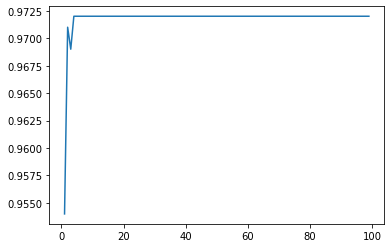

In [89]:
# This will plot graph vs accuracy for 100 values of k
import seaborn as sn
score = []
for k in range(1,100):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    score.append(classifier.score(X_test, y_test))
sn.lineplot(range(1,100),score)